# Monthly Average Temp Prediction SARIMA

In [1]:
import pandas as pd

In [2]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
def d_parser(x):
    return datetime.strptime(x, '%m/%d/%Y')
dm = pd.read_csv('DATA_TEMP_DATE_JA2.csv',parse_dates=['Date'], date_parser=d_parser)

In [4]:
dm.head()

,Date,YEAR,MO,DY,T2M,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,PS,WS10M,WS50M
0,1981-02-01,1981,2,1,18.29,14.14,26.83,12.69,3.24,100.63,2.51,4.56
1,1981-02-02,1981,2,2,15.67,13.92,23.51,9.59,0.00,100.86,3.33,5.34
2,1981-02-03,1981,2,3,15.19,15.24,23.89,8.65,0.00,100.87,2.16,3.16
3,1981-02-04,1981,2,4,17.93,18.34,27.12,8.79,0.00,100.70,1.82,2.49
4,1981-02-05,1981,2,5,19.73,18.20,29.02,10.83,0.00,100.69,1.89,2.59


<AxesSubplot:>

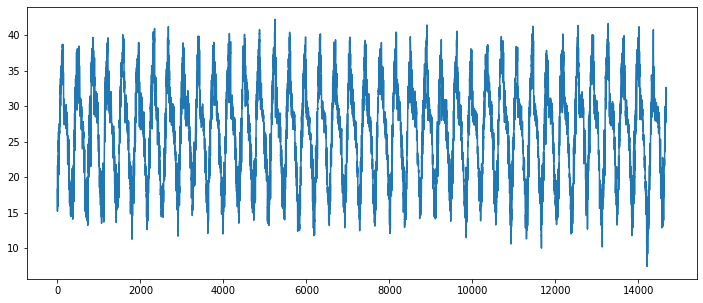

In [5]:
dm['T2M'].plot(figsize=(12,5))

In [6]:
dm.loc[0, 'Date'].day_name()

'Sunday'

In [7]:
dm['Date'].dt.day_name()

0           Sunday
1           Monday
2          Tuesday
3        Wednesday
4         Thursday
           ...    
14664     Saturday
14665       Sunday
14666       Monday
14667      Tuesday
14668    Wednesday
Name: Date, Length: 14669, dtype: object

In [8]:
dm['DayOfWeek'] = dm['Date'].dt.day_name()


In [9]:
dm

,Date,YEAR,MO,DY,T2M,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,PS,WS10M,WS50M,DayOfWeek
0,1981-02-01,1981,2,1,18.29,14.14,26.83,12.69,3.24,100.63,2.51,4.56,Sunday
1,1981-02-02,1981,2,2,15.67,13.92,23.51,9.59,0.00,100.86,3.33,5.34,Monday
2,1981-02-03,1981,2,3,15.19,15.24,23.89,8.65,0.00,100.87,2.16,3.16,Tuesday
3,1981-02-04,1981,2,4,17.93,18.34,27.12,8.79,0.00,100.70,1.82,2.49,Wednesday
4,1981-02-05,1981,2,5,19.73,18.20,29.02,10.83,0.00,100.69,1.89,2.59,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,2021-03-27,2021,3,27,28.62,18.30,37.85,19.56,0.00,99.99,3.11,4.49,Saturday
14665,2021-03-28,2021,3,28,30.79,17.46,39.60,22.14,0.00,99.76,2.39,3.26,Sunday
14666,2021-03-29,2021,3,29,31.72,17.46,40.96,23.50,0.00,99.55,3.15,4.38,Monday
14667,2021-03-30,2021,3,30,32.62,20.03,42.57,22.54,0.00,99.04,4.76,7.52,Tuesday


In [10]:
dm.set_index('Date', inplace=True)


In [11]:
dm

,YEAR,MO,DY,T2M,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,PS,WS10M,WS50M,DayOfWeek
Date,,,,,,,,,,,,
1981-02-01,1981,2,1,18.29,14.14,26.83,12.69,3.24,100.63,2.51,4.56,Sunday
1981-02-02,1981,2,2,15.67,13.92,23.51,9.59,0.00,100.86,3.33,5.34,Monday
1981-02-03,1981,2,3,15.19,15.24,23.89,8.65,0.00,100.87,2.16,3.16,Tuesday
1981-02-04,1981,2,4,17.93,18.34,27.12,8.79,0.00,100.70,1.82,2.49,Wednesday
1981-02-05,1981,2,5,19.73,18.20,29.02,10.83,0.00,100.69,1.89,2.59,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,2021,3,27,28.62,18.30,37.85,19.56,0.00,99.99,3.11,4.49,Saturday
2021-03-28,2021,3,28,30.79,17.46,39.60,22.14,0.00,99.76,2.39,3.26,Sunday
2021-03-29,2021,3,29,31.72,17.46,40.96,23.50,0.00,99.55,3.15,4.38,Monday


In [12]:
dm.resample('M').mean()


,YEAR,MO,DY,T2M,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,PS,WS10M,WS50M
Date,,,,,,,,,,,
1981-02-28,1981.0,2.0,14.5,19.990000,18.302857,29.946429,11.645714,0.307857,100.421071,3.091071,4.796786
1981-03-31,1981.0,3.0,16.0,25.627097,17.139032,34.724839,17.586452,0.243226,100.160000,2.975161,4.619355
1981-04-30,1981.0,4.0,15.5,31.558000,18.856333,41.242333,22.385667,0.291667,99.616000,3.479667,5.401333
1981-05-31,1981.0,5.0,16.0,35.669032,15.299355,43.295484,27.997097,0.907097,99.217742,3.555161,5.029355
1981-06-30,1981.0,6.0,15.5,35.887667,13.356333,42.569000,29.213333,3.224000,98.768667,4.032333,5.472000
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,2020.0,11.0,15.5,21.189333,14.506333,29.326667,14.821667,0.131667,100.577333,2.475667,3.926000
2020-12-31,2020.0,12.0,16.0,17.003226,15.556129,25.946129,10.389032,0.198710,100.600323,3.244839,5.126129
2021-01-31,2021.0,1.0,16.0,17.522258,16.070000,26.429677,10.360968,0.002258,100.519677,2.904839,4.486452


In [13]:
df=dm.resample('M').mean()
df

,YEAR,MO,DY,T2M,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,PS,WS10M,WS50M
Date,,,,,,,,,,,
1981-02-28,1981.0,2.0,14.5,19.990000,18.302857,29.946429,11.645714,0.307857,100.421071,3.091071,4.796786
1981-03-31,1981.0,3.0,16.0,25.627097,17.139032,34.724839,17.586452,0.243226,100.160000,2.975161,4.619355
1981-04-30,1981.0,4.0,15.5,31.558000,18.856333,41.242333,22.385667,0.291667,99.616000,3.479667,5.401333
1981-05-31,1981.0,5.0,16.0,35.669032,15.299355,43.295484,27.997097,0.907097,99.217742,3.555161,5.029355
1981-06-30,1981.0,6.0,15.5,35.887667,13.356333,42.569000,29.213333,3.224000,98.768667,4.032333,5.472000
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,2020.0,11.0,15.5,21.189333,14.506333,29.326667,14.821667,0.131667,100.577333,2.475667,3.926000
2020-12-31,2020.0,12.0,16.0,17.003226,15.556129,25.946129,10.389032,0.198710,100.600323,3.244839,5.126129
2021-01-31,2021.0,1.0,16.0,17.522258,16.070000,26.429677,10.360968,0.002258,100.519677,2.904839,4.486452


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1.ADF :",dftest[0])
    print("2.P-value :",dftest[1])
    print("3.Num of Lag :",dftest[2])
    print("4.Num of observation used for ADF Regresstion And Critical value calculation:",dftest[3])
    print("5.Criitical values:")
    for key, val in dftest[4].item():
        print("\t",key,":",val)

In [16]:
ad_test(df['T2M'])

1.ADF : -6.139747403222229
2.P-value : 8.02462506921626e-08
3.Num of Lag : 18
4.Num of observation used for ADF Regresstion And Critical value calculation: 463
5.Criitical values:


AttributeError: 'dict' object has no attribute 'item'

# SARIMAX

In [17]:
from pmdarima import auto_arima

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
stepwise_fit = auto_arima(df['T2M'], trace = True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2082.291, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3182.357, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2662.824, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2724.333, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4561.062, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2338.086, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2107.706, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2118.484, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2084.243, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2436.178, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2300.464, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2093.168, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2419.045, Time=0.11 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  482
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1035.146
Date:                Sun, 17 Oct 2021   AIC                           2082.291
Time:                        17:37:48   BIC                           2107.359
Sample:                             0   HQIC                          2092.143
                                - 482                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2793      0.288     25.270      0.000       6.715       7.844
ar.L1          1.6494      0.018     89.912      0.000       1.613       1.685
ar.L2         -0.9228      0.019    -47.450      0.000      -0.961      -0.885
ma.L1         -0.5891      0.044    -13.274      0.000      -0.676      -0.502
ma.L2         -0.2364      0.049     -4.849      0.000      -0.332      -0.141
sigma2         4.2560      0.348     12.241      0.000       3.575       4.937
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.97   Prob(JB):                         0.05
Heteroskedasticity (H):               1.18   Skew:                            -0.15
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [21]:
SARIMAX?

In [22]:
print(df.shape)

(482, 11)


In [23]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)


(452, 11) (30, 11)


In [26]:
model=SARIMAX(train['T2M'],order=(2,0,2),seasonal_order=(3,0,3,12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                        T2M   No. Observations:                  452
Model:             SARIMAX(2, 0, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -717.094
Date:                                    Sun, 17 Oct 2021   AIC                           1456.189
Time:                                            17:38:39   BIC                           1501.439
Sample:                                        02-28-1981   HQIC                          1474.020
                                             - 09-30-2018                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0663      0.023     46.076      0.000       1.021       1.112
ar.L2         -0.0776      0.014     -5.354      0.000      -0.106      -0.049
ma.L1         -0.6940      0.029    -23.847      0.000      -0.751      -0.637
ma.L2         -0.2277      0.035     -6.555      0.000      -0.296      -0.160
ar.S.L12      -0.0187      0.044     -0.424      0.671      -0.105       0.067
ar.S.L24       0.6104      0.066      9.198      0.000       0.480       0.740
ar.S.L36       0.4081      0.038     10.760      0.000       0.334       0.482
ma.S.L12       0.0228      0.040      0.577      0.564      -0.055       0.100
ma.S.L24      -0.4681      0.094     -4.981      0.000      -0.652      -0.284
ma.S.L36      -0.3913      0.040     -9.685      0.000      -0.470      -0.312
sigma2         1.1973      0.079     15.158      0.000       1.042       1.352
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.10
Prob(Q):                              1.00   Prob(JB):                         0.95
Heteroskedasticity (H):               0.93   Skew:                             0.02
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2018-10-31    25.468711
2018-11-30    20.971111
2018-12-31    17.129665
2019-01-31    16.544249
2019-02-28    20.404543
2019-03-31    26.523350
2019-04-30    32.829883
2019-05-31    36.481197
2019-06-30    36.178331
2019-07-31    30.978469
2019-08-31    29.485065
2019-09-30    28.414057
2019-10-31    26.111388
2019-11-30    21.639154
2019-12-31    17.576182
2020-01-31    16.518154
2020-02-29    20.777455
2020-03-31    26.852769
2020-04-30    32.746308
2020-05-31    36.287724
2020-06-30    36.110242
2020-07-31    31.192069
2020-08-31    29.450756
2020-09-30    28.277327
2020-10-31    25.763562
2020-11-30    21.302073
2020-12-31    17.316485
2021-01-31    16.590363
2021-02-28    20.488000
2021-03-31    26.625470
Freq: M, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

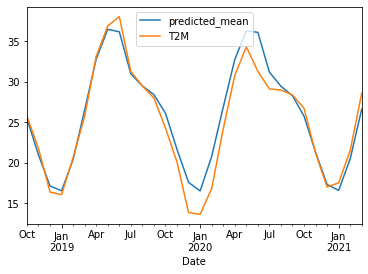

In [28]:
pred.plot(legend=True)
test['T2M'].plot(legend=True)

In [29]:
test['T2M'].mean()

25.05107195914332

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['T2M']))
print(rmse)

1.8209467973215405


In [94]:
model12=SARIMAX(train['T2M'],order=(2,0,2),seasonal_order=(3, 3, 3, 3))

# model12=SARIMA(df['T2M'],order=(4,0,4))
model12=model12.fit()
df.tail()

,YEAR,MO,DY,T2M,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR,PS,WS10M,WS50M
Date,,,,,,,,,,,
2020-11-30,2020.0,11.0,15.5,21.189333,14.506333,29.326667,14.821667,0.131667,100.577333,2.475667,3.926000
2020-12-31,2020.0,12.0,16.0,17.003226,15.556129,25.946129,10.389032,0.198710,100.600323,3.244839,5.126129
2021-01-31,2021.0,1.0,16.0,17.522258,16.070000,26.429677,10.360968,0.002258,100.519677,2.904839,4.486452
2021-02-28,2021.0,2.0,14.5,21.523214,18.043571,31.156071,13.112143,0.036071,100.446786,2.946429,4.466071
2021-03-31,2021.0,3.0,16.0,28.602581,17.870968,37.780645,19.909677,0.003548,100.045161,3.465484,5.271935


In [95]:
index_future_dates=pd.date_range(start='2021-03-31',end='2021-04-30')
print(index_future_dates)

DatetimeIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', freq='D')


In [96]:
pred=model12.predict(start=len(df),end=len(df)+30,typ='level').rename('ARIMA PREDICTION')
                                                                      

In [97]:
pred.index=index_future_dates
print(pred)

2021-03-31    32.489765
2021-04-01    32.411290
2021-04-02    33.110092
2021-04-03    30.286734
2021-04-04    23.683524
2021-04-05    23.037308
2021-04-06    26.308356
2021-04-07    16.302578
2021-04-08    12.628255
2021-04-09    17.823916
2021-04-10    17.560949
2021-04-11    22.390196
2021-04-12    31.817709
2021-04-13    29.904018
2021-04-14    31.102016
2021-04-15    29.681941
2021-04-16    21.332348
2021-04-17    21.175657
2021-04-18    25.673923
2021-04-19    14.068605
2021-04-20    11.070800
2021-04-21    17.530998
2021-04-22    15.388633
2021-04-23    20.663916
2021-04-24    31.139077
2021-04-25    27.330232
2021-04-26    29.103843
2021-04-27    29.075628
2021-04-28    18.904184
2021-04-29    19.319307
2021-04-30    25.049730
Freq: D, Name: ARIMA PREDICTION, dtype: float64


<AxesSubplot:>

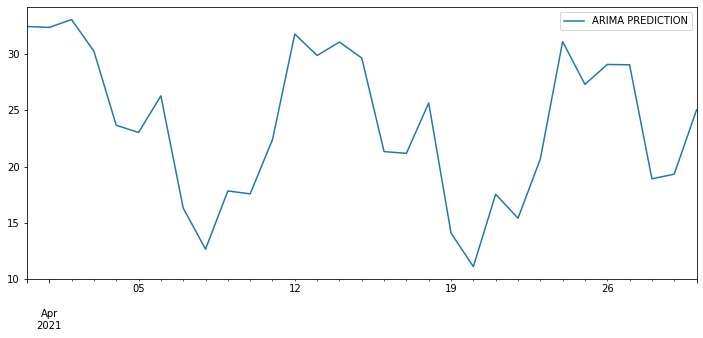

In [98]:
pred.plot(figsize=(12,5),legend=True)